In [31]:
import pandas as pd
import json

In [14]:
data = pd.read_parquet('/Users/florianwicher/Desktop/resultData/Sensor_fault/RNN_result.parquet.gzip')
data

,detection_delay,tp,fp,fn,tn,scenario
0,1,1.0,0.0,0.000116,0.999884,0_100
1,1,1.0,0.0,0.000116,0.999884,0_101
2,3,1.0,0.0,0.000347,0.999653,0_102
3,1,1.0,0.0,0.239504,0.760496,0_103
4,1,1.0,0.0,0.000116,0.999884,0_104
...,...,...,...,...,...,...
865,1,1.0,0.0,0.000116,0.999884,5_96
866,2,1.0,0.0,0.000231,0.999769,5_97
867,1,1.0,0.0,0.211031,0.788969,5_98
868,1,1.0,0.0,0.000116,0.999884,5_99


In [15]:
def path(model):
    return f'/Users/florianwicher/Desktop/resultData/Sensor_fault/{model}_result.parquet.gzip'


LSTM_data = pd.read_parquet(path('LSTM'))
GRU_data = pd.read_parquet(path('GRU'))
Ridge_data = pd.read_parquet(path('Ridge'))
Linreg_data = pd.read_parquet(path('LinearRegression'))
RNN_data= pd.read_parquet(path('RNN'))

LSTM_data['folder_id'] = LSTM_data['scenario'].str.split('_').str[0]
LSTM_data['scenario_id'] = LSTM_data['scenario'].str.split('_').str[1]
LSTM_data = LSTM_data.drop(['scenario'],axis=1)

GRU_data['folder_id'] = GRU_data['scenario'].str.split('_').str[0]
GRU_data['scenario_id'] = GRU_data['scenario'].str.split('_').str[1]
GRU_data = GRU_data.drop(['scenario'],axis=1)

Ridge_data['folder_id'] = Ridge_data['scenario'].str.split('_').str[0]
Ridge_data['scenario_id'] = Ridge_data['scenario'].str.split('_').str[1]
Ridge_data = Ridge_data.drop(['scenario'],axis=1)

Linreg_data['folder_id'] = Linreg_data['scenario'].str.split('_').str[0]
Linreg_data['scenario_id'] = Linreg_data['scenario'].str.split('_').str[1]
Linreg_data = Linreg_data.drop(['scenario'],axis=1)

RNN_data['folder_id'] = RNN_data['scenario'].str.split('_').str[0]
RNN_data['scenario_id'] = RNN_data['scenario'].str.split('_').str[1]
RNN_data = RNN_data.drop(['scenario'],axis=1)


In [16]:
metric = 'fn'

#print(f'LSTM {metric} mean: {round(LSTM_data.fn.mean(),3)}, variance: {round(LSTM_data.fn.var(),3)}')
#print(f'GRU {metric} mean: {round(GRU_data.fn.mean(),3)}, variance: {round(GRU_data.fn.var(),3)}')
#print(f'Ridge {metric} mean: {round(Ridge_data.fn.mean(),3)}, variance: {round(Ridge_data.fn.var(),3)}')
#print(f'Linreg {metric} mean: {round(Linreg_data.fn.mean(),3)}, variance: {round(Linreg_data.fn.var(),3)}')
print(f'RNN {metric} mean: {round(RNN_data.detection_delay.mean(),3)}, variance: {round(RNN_data.detection_delay.var(),3)}')


RNN fn mean: 1.124, variance: 1.264


In [17]:
with open('sensor_fault_types.json') as json_file:
        store = json.load(json_file)
        
store

{'drift': [{'folder_id': '0', 'scenario_id': '112'},
  {'folder_id': '0', 'scenario_id': '67'},
  {'folder_id': '0', 'scenario_id': '122'},
  {'folder_id': '0', 'scenario_id': '32'},
  {'folder_id': '0', 'scenario_id': '57'},
  {'folder_id': '0', 'scenario_id': '92'},
  {'folder_id': '0', 'scenario_id': '2'},
  {'folder_id': '0', 'scenario_id': '72'},
  {'folder_id': '0', 'scenario_id': '107'},
  {'folder_id': '0', 'scenario_id': '17'},
  {'folder_id': '0', 'scenario_id': '87'},
  {'folder_id': '0', 'scenario_id': '42'},
  {'folder_id': '0', 'scenario_id': '137'},
  {'folder_id': '0', 'scenario_id': '27'},
  {'folder_id': '0', 'scenario_id': '7'},
  {'folder_id': '0', 'scenario_id': '97'},
  {'folder_id': '0', 'scenario_id': '52'},
  {'folder_id': '0', 'scenario_id': '142'},
  {'folder_id': '0', 'scenario_id': '37'},
  {'folder_id': '0', 'scenario_id': '127'},
  {'folder_id': '0', 'scenario_id': '62'},
  {'folder_id': '0', 'scenario_id': '117'},
  {'folder_id': '0', 'scenario_id': '22'

In [18]:
data = []
for key, values in store.items():
    for entry in values:
        entry['key'] = key
        data.append(entry)

df = pd.DataFrame(data)
df

,folder_id,scenario_id,key
0,0,112,drift
1,0,67,drift
2,0,122,drift
3,0,32,drift
4,0,57,drift
...,...,...,...
865,5,36,constant
866,5,76,constant
867,5,71,constant
868,5,41,constant


In [21]:
# Funktion zum Eintragen des Keys in die dritte Spalte basierend auf 'folder_id' und 's_id'
def eintrag_key(row):
    for key, values in store.items():
        for entry in values:
            if entry['folder_id'] == row['folder_id'] and entry['scenario_id'] == row['scenario_id']:
                return key
    return None  # Wenn kein übereinstimmender Key gefunden wurde

# Die Funktion auf jede Zeile des DataFrames anwenden
LSTM_data['key'] = LSTM_data.apply(eintrag_key, axis=1)
GRU_data['key'] = GRU_data.apply(eintrag_key, axis=1)
Ridge_data['key'] = Ridge_data.apply(eintrag_key, axis=1)
Linreg_data['key'] = Linreg_data.apply(eintrag_key, axis=1)
RNN_data['key'] = RNN_data.apply(eintrag_key, axis=1)

# Anzeigen des aktualisierten DataFrames


In [28]:
df_constant = RNN_data[RNN_data['key'] == 'constant']
df_normal = RNN_data[RNN_data['key'] == 'normal']
df_drift = RNN_data[RNN_data['key'] == 'drift']
df_percentage = RNN_data[RNN_data['key'] == 'percentage']
df_stuck_zero = RNN_data[RNN_data['key'] == 'stuckzero']

In [29]:
df_constant

,detection_delay,tp,fp,fn,tn,folder_id,scenario_id,key
1,1,1.0,0.0,0.000116,0.999884,0,101,constant
6,1,1.0,0.0,0.000116,0.999884,0,106,constant
12,1,1.0,0.0,0.000116,0.999884,0,111,constant
17,1,1.0,0.0,0.000116,0.999884,0,116,constant
21,1,1.0,0.0,0.000116,0.999884,0,11,constant
...,...,...,...,...,...,...,...,...
843,1,1.0,0.0,0.000116,0.999884,5,76,constant
849,1,1.0,0.0,0.000116,0.999884,5,81,constant
854,1,1.0,0.0,0.000116,0.999884,5,86,constant
860,1,1.0,0.0,0.000116,0.999884,5,91,constant


In [30]:
dfs = [df_constant, df_drift, df_normal, df_percentage, df_stuck_zero]
df_names = ['df_constant', 'df_drift', 'df_normal', 'df_percentage', 'df_stuck_zero']

for i in range(len(dfs)):
    print(f"{df_names[i]} tn mean: {dfs[i].tn.mean()}")
    print(f"{df_names[i]} tn median: {dfs[i].tn.median()}")
    print(f"{df_names[i]} tn min: {dfs[i].tn.min()}")
    print(f"{df_names[i]} tn max: {dfs[i].tn.max()}")
    print(f"{df_names[i]} tn var: {dfs[i].tn.var()}")
    print(" ")
    
for i in range(len(dfs)):
    print(f"{df_names[i]} detection_delay mean: {dfs[i].detection_delay.mean()}")
    print(f"{df_names[i]} detection_delay median: {dfs[i].detection_delay.median()}")
    print(f"{df_names[i]} detection_delay min: {dfs[i].detection_delay.min()}")
    print(f"{df_names[i]} detection_delay max: {dfs[i].detection_delay.max()}")
    print(f"{df_names[i]} detection_delay var: {dfs[i].detection_delay.var()}")
    print(" ")

df_constant tn mean: 0.9998989062320424
df_constant tn median: 0.999884272653628
df_constant tn min: 0.9996528982992017
df_constant tn max: 1.0
df_constant tn var: 2.8806887053957954e-09
 
df_drift tn mean: 0.9997872265411123
df_drift tn median: 0.9997685720897941
df_drift tn min: 0.997920997920998
df_drift tn max: 1.0
df_drift tn var: 3.795020487275036e-08
 
df_normal tn mean: 0.7852926786581576
df_normal tn median: 0.787351348060105
df_normal tn min: 0.6698193658423134
df_normal tn max: 0.830130668716372
df_normal tn var: 0.0006358814411013666
 
df_percentage tn mean: 0.9812163192192777
df_percentage tn median: 0.999884272653628
df_percentage tn min: 0.5580674331481721
df_percentage tn max: 1.0
df_percentage tn var: 0.006488410870933483
 
df_stuck_zero tn mean: 0.9999035605446882
df_stuck_zero tn median: 0.999884272653628
df_stuck_zero tn min: 0.999884272653628
df_stuck_zero tn max: 1.0
df_stuck_zero tn var: 1.870865810456733e-09
 
df_constant detection_delay mean: 0.867816091954023


In [36]:
import matplotlib.pyplot as plt

with open("LR_resuts.json", "r") as file: 
        data = json.load(file)

In [37]:
data

{'RNN': {'Train_Loss(MAE)': [[0.26,
    0.2366,
    0.3111,
    0.2589,
    0.2575,
    0.2361,
    0.2443,
    0.5136,
    0.2335,
    0.2433,
    0.3006,
    0.2901,
    0.9782,
    0.2358,
    0.6198,
    0.2341,
    0.2817,
    0.3051,
    0.2524,
    0.2474],
   [0.244,
    0.251,
    0.2365,
    0.2347,
    0.2743,
    0.2666,
    0.2676,
    0.2634,
    0.251,
    0.2411,
    0.2637,
    0.2516,
    0.2337,
    0.2523,
    0.2346,
    0.2438,
    0.2813,
    0.2345,
    0.2397,
    0.2367],
   [0.2407,
    0.2348,
    0.2549,
    0.2452,
    0.2398,
    0.237,
    0.2361,
    0.2335,
    0.2391,
    0.2434,
    0.2357,
    0.2402,
    0.2379,
    0.2339,
    0.2338,
    0.3025,
    0.2431,
    0.2536,
    0.2409,
    0.2343],
   [0.2501,
    0.2581,
    0.2533,
    0.2507,
    0.2548,
    0.2585,
    0.2578,
    0.2513,
    0.2561,
    0.253,
    0.259,
    0.2572,
    0.2589,
    0.2559,
    0.2565,
    0.2497,
    0.2497,
    0.2511,
    0.2515,
    0.2555]],
  'Val_Loss(MAE)'

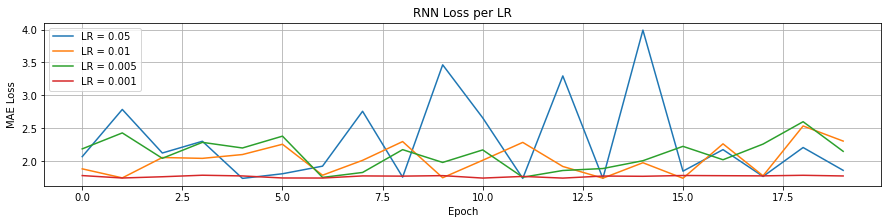

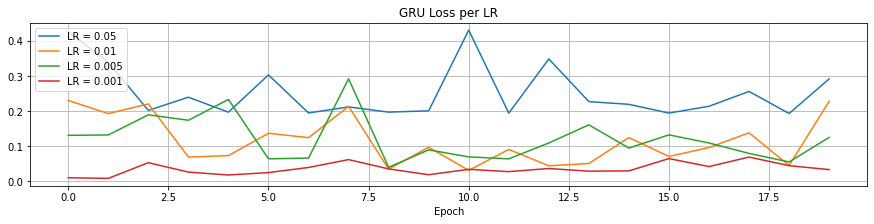

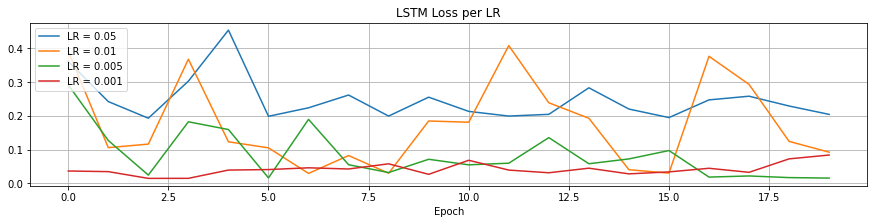

In [90]:
goal = 'Val'

# Plot für RNN
plt.figure(figsize=(15, 3))
plt.plot(data['RNN'][f'{goal}_Loss(MAE)'][0], label='LR = 0.05')
plt.plot(data['RNN'][f'{goal}_Loss(MAE)'][1], label='LR = 0.01')
plt.plot(data['RNN'][f'{goal}_Loss(MAE)'][2], label='LR = 0.005')
plt.plot(data['RNN'][f'{goal}_Loss(MAE)'][3], label='LR = 0.001')
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('MAE Loss')
plt.title(f"RNN Loss per LR")
plt.legend(loc='upper left')
plt.show()

# Plot für GRU
plt.figure(figsize=(15, 3))
plt.plot(data['GRU'][f'{goal}_Loss(MAE)'][0], label='LR = 0.05')
plt.plot(data['GRU'][f'{goal}_Loss(MAE)'][1], label='LR = 0.01')
plt.plot(data['GRU'][f'{goal}_Loss(MAE)'][2], label='LR = 0.005')
plt.plot(data['GRU'][f'{goal}_Loss(MAE)'][3], label='LR = 0.001')
plt.grid(True)
plt.xlabel('Epoch')
plt.title(f"GRU Loss per LR")
plt.legend(loc='upper left')
plt.show()

# Plot für LSTM
plt.figure(figsize=(15, 3))
plt.plot(data['LSTM'][f'{goal}_Loss(MAE)'][0], label='LR = 0.05')
plt.plot(data['LSTM'][f'{goal}_Loss(MAE)'][1], label='LR = 0.01')
plt.plot(data['LSTM'][f'{goal}_Loss(MAE)'][2], label='LR = 0.005')
plt.plot(data['LSTM'][f'{goal}_Loss(MAE)'][3], label='LR = 0.001')
plt.grid(True)
plt.xlabel('Epoch')
plt.title(f"LSTM Loss per LR")
plt.legend(loc='upper left')
plt.show()

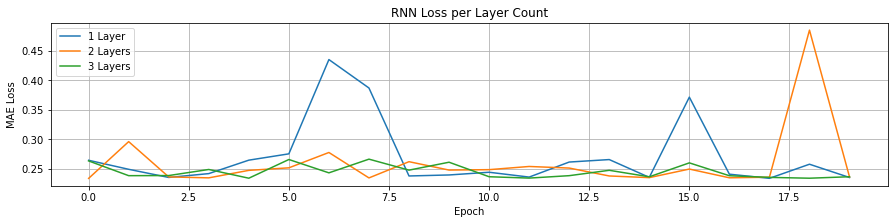

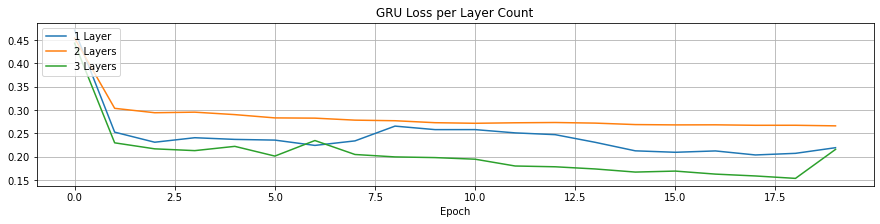

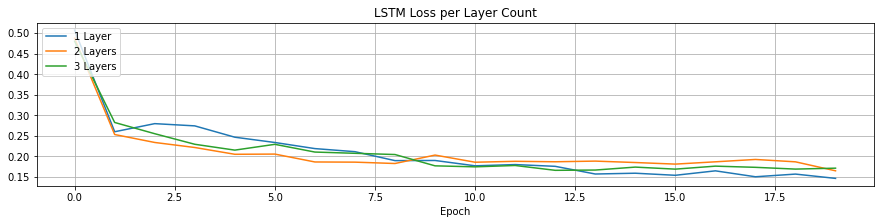

In [93]:
with open("Architecture_resuts.json", "r") as file: 
        data = json.load(file)
        
        
goal = 'Train'

# Plot für RNN
plt.figure(figsize=(15, 3))
plt.plot(data['RNN'][f'{goal}_Loss(MAE)'][0], label='1 Layer')
plt.plot(data['RNN'][f'{goal}_Loss(MAE)'][1], label='2 Layers')
plt.plot(data['RNN'][f'{goal}_Loss(MAE)'][2], label='3 Layers')
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('MAE Loss')
plt.title(f"RNN Loss per Layer Count")
plt.legend(loc='upper left')
plt.show()

# Plot für GRU
plt.figure(figsize=(15, 3))
plt.plot(data['GRU'][f'{goal}_Loss(MAE)'][0], label='1 Layer')
plt.plot(data['GRU'][f'{goal}_Loss(MAE)'][1], label='2 Layers')
plt.plot(data['GRU'][f'{goal}_Loss(MAE)'][2], label='3 Layers')
plt.grid(True)
plt.xlabel('Epoch')
plt.title(f"GRU Loss per Layer Count")
plt.legend(loc='upper left')
plt.show()

# Plot für LSTM
plt.figure(figsize=(15, 3))
plt.plot(data['LSTM'][f'{goal}_Loss(MAE)'][0], label='1 Layer')
plt.plot(data['LSTM'][f'{goal}_Loss(MAE)'][1], label='2 Layers')
plt.plot(data['LSTM'][f'{goal}_Loss(MAE)'][2], label='3 Layers')
plt.grid(True)
plt.xlabel('Epoch')
plt.title(f"LSTM Loss per Layer Count")
plt.legend(loc='upper left')
plt.show()

In [97]:
import numpy as np

print(np.random.randint(0,31))

26
